In [2]:
## Libraries to be used
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from statsmodels.formula.api import ols,logit

ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py)

In [ ]:
## Data to be used 
data = pd.read_csv('cleaned.csv')
data.head(5)

,Unnamed: 0,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,...,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,SexBinary
0,0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,...,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,0
1,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,...,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,0
2,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,...,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,0
3,3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,...,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,1
4,4,Good,Within the past year,No,No,No,No,No,No,No,...,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,1


## Exploratory Data Analysis 

---
### Question 1: What is the distribution of the heart disease across age groups 

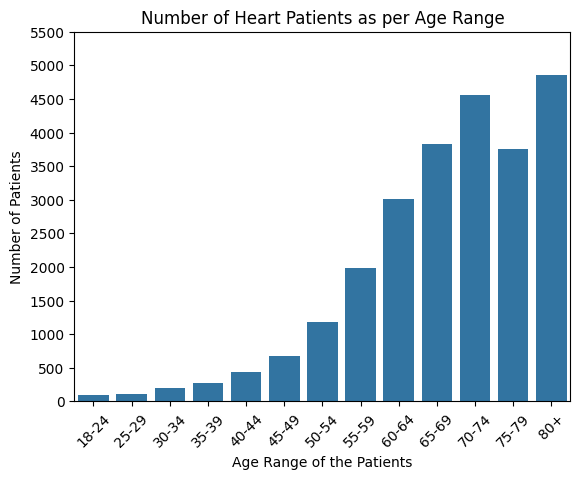

In [ ]:
## Age and HeartDisease data 
ageData = data.loc[data['Heart_Disease'] == 'Yes', ['Heart_Disease','Age_Category']] ## Filtering out the Heart Patients 
ageRange = ageData.groupby('Age_Category').count().reset_index()
sns.barplot(x = 'Age_Category', y = 'Heart_Disease', data = ageRange)
plt.title("Number of Heart Patients as per Age Range")
plt.xticks(rotation = 45)
plt.ylim(0,5000)
plt.ylabel("Number of Patients")
plt.xlabel("Age Range of the Patients")
plt.yticks(np.arange(0,6000, 500))
plt.show()

### “There is a common perception that older individuals are more likely to have heart disease. This assumption can be evaluated using the insights derived from our data analysis.”
---

### Question 2: Does Heart Disease prevalance differ by sex?!


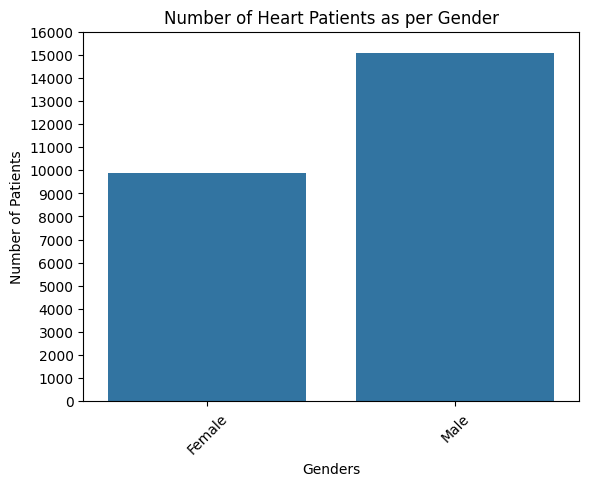

In [ ]:
##Sex and Heart Disease Data
genderHeartData = data.loc[data['Heart_Disease'] == 'Yes', ['Heart_Disease','Sex']]
groupedGender = genderHeartData.groupby('Sex').count().reset_index()
sns.barplot(x = 'Sex', y = 'Heart_Disease', data = groupedGender)
plt.title("Number of Heart Patients as per Gender")
plt.xticks(rotation = 45)
plt.ylim(0,1600)
plt.ylabel("Number of Patients")
plt.xlabel("Genders")
plt.yticks(np.arange(0,17000, 1000))
plt.show()

### As seen from the barplot, Male are more prone to Heart Disease compared to Woman
---

### Question 3: Do smokers show higher rates of heart disease?

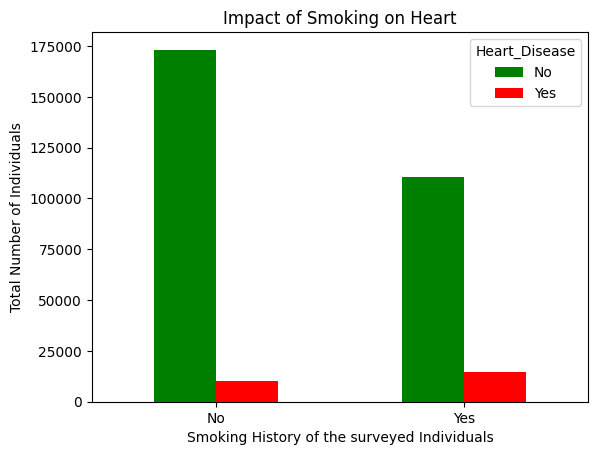

In [ ]:
##Smokers and HeartDisease Data 
smokingHeart = data[['Smoking_History','Heart_Disease']]
smokingGrouped = smokingHeart.groupby('Smoking_History')['Heart_Disease'].value_counts().unstack()
smokingGrouped.plot(kind = 'bar',stacked=False, color = ['green','red'])
plt.title("Impact of Smoking on Heart")
plt.xlabel("Smoking History of the surveyed Individuals")
plt.ylabel("Total Number of Individuals")
plt.xticks(rotation = 0)
plt.show()

### Smokers show a higher proportion of heart disease cases compared to non-smokers, indicating a potential link between smoking and heart disease.
---


### Question 4: Does exercise correlate with reduced heart disease risk? 

### Individuals who exercise have a lower proportion of heart disease cases compared to those who do not, suggesting a protective effect of regular exercise.

---

### Question 5: How is heart disease distributed across BMI ranges?

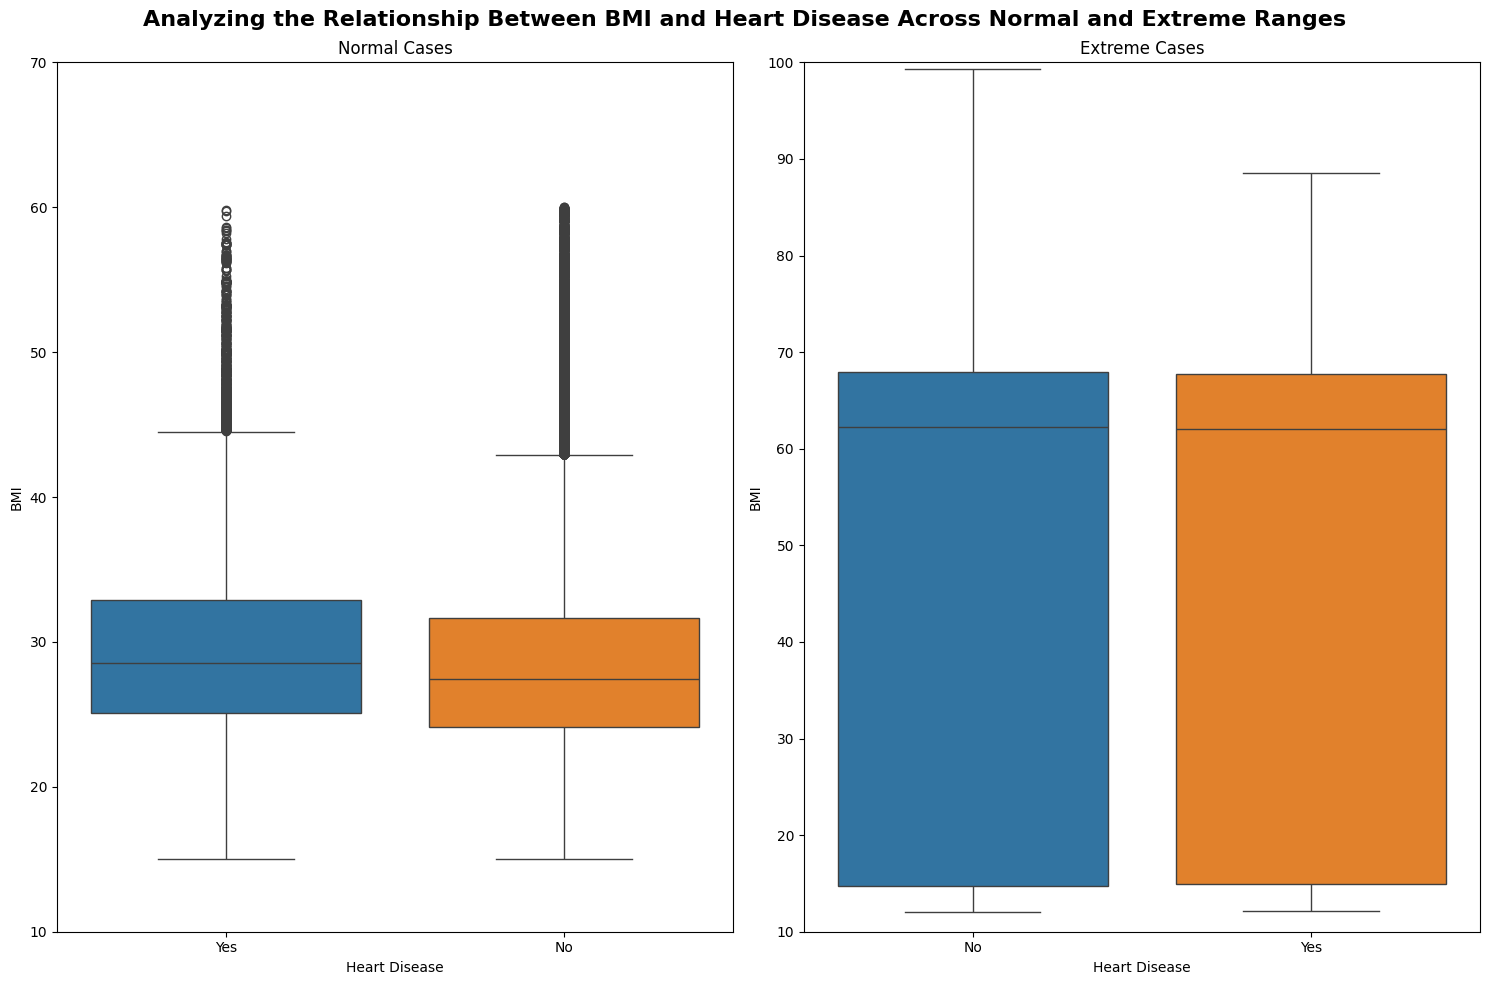

In [ ]:
### Relation of the BMI and the heart rate
bmiHeart = data[['Heart_Disease', 'BMI']]
extremeCases = bmiHeart[(data['BMI'] >=60) | (bmiHeart['BMI'] <= 15)] ##These are the rare cases so we will visualize them differently 
normalCases = bmiHeart[(bmiHeart['BMI'] < 60) &(bmiHeart['BMI'] > 15)]
fig, ax = plt.subplots(1,2,figsize = (15,10))
def plottingBMI(x, y , data, title, xlabel, ylabel, ylim1,ylim2, axes):
    sns.boxplot(x = x, y = y , data = data, hue = x, ax = axes)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.set_ylim(ylim1, ylim2)

plottingBMI('Heart_Disease','BMI', normalCases, 'Normal Cases', 'Heart Disease', 'BMI', 10,70, ax[0])
plottingBMI('Heart_Disease','BMI', extremeCases, 'Extreme Cases', 'Heart Disease', 'BMI', 10,100, ax[1])
fig.suptitle("Analyzing the Relationship Between BMI and Heart Disease Across Normal and Extreme Ranges", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### To better understand the relationship between Body Mass Index (BMI) and heart disease, the dataset was split into two groups: normal BMI cases (15 ≤ BMI ≤ 60) and extreme BMI cases (BMI < 15 or BMI > 60).

### Among normal BMI individuals, those with heart disease tended to have slightly higher BMI values, and a broader distribution, consistent with established medical research linking higher BMI to cardiovascular risk.

### In contrast, among extreme BMI individuals, the BMI distributions for both heart disease and non-heart disease groups were nearly identical, with similar medians and interquartile ranges. This suggests that, at extremely high or low BMI levels, BMI alone may not be a strong predictor, and other risk factors could play a more dominant role.

---



### Question 6: Is there any visible trend between alcohol consumption and heart disease?

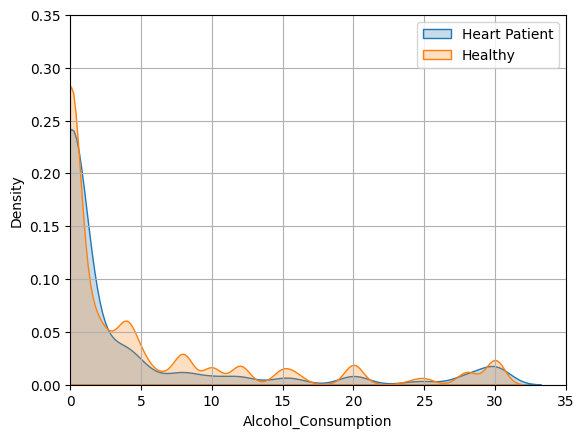

In [ ]:
### Alcohol and Heart 
alcoholicHeart = data[['Alcohol_Consumption', 'Heart_Disease']]
alcholic = alcoholicHeart[alcoholicHeart['Heart_Disease'] == 'Yes']
nonAlcoholic = alcoholicHeart[alcoholicHeart['Heart_Disease'] == 'No']
sns.kdeplot(alcholic, x = 'Alcohol_Consumption', fill = True, label = 'Heart Patient')
sns.kdeplot(nonAlcoholic, x = 'Alcohol_Consumption', fill = True, label = 'Healthy')
plt.ylim(0.00, 0.35)
plt.xlim(0, 35)
plt.legend()
plt.grid(True)

### While most individuals report low alcohol consumption, those with heart disease exhibit a slightly higher tendency toward heavier drinking, suggesting alcohol may contribute modestly to cardiovascular risk.
---

### Question 7: Are diabetics more likely to have heart disease in this population?


Text(0.5, 0.98, 'Effect of Diabetes on the Heart Patients with exceptional cases like(Pre-Diabetes, Pregnancy Period)')

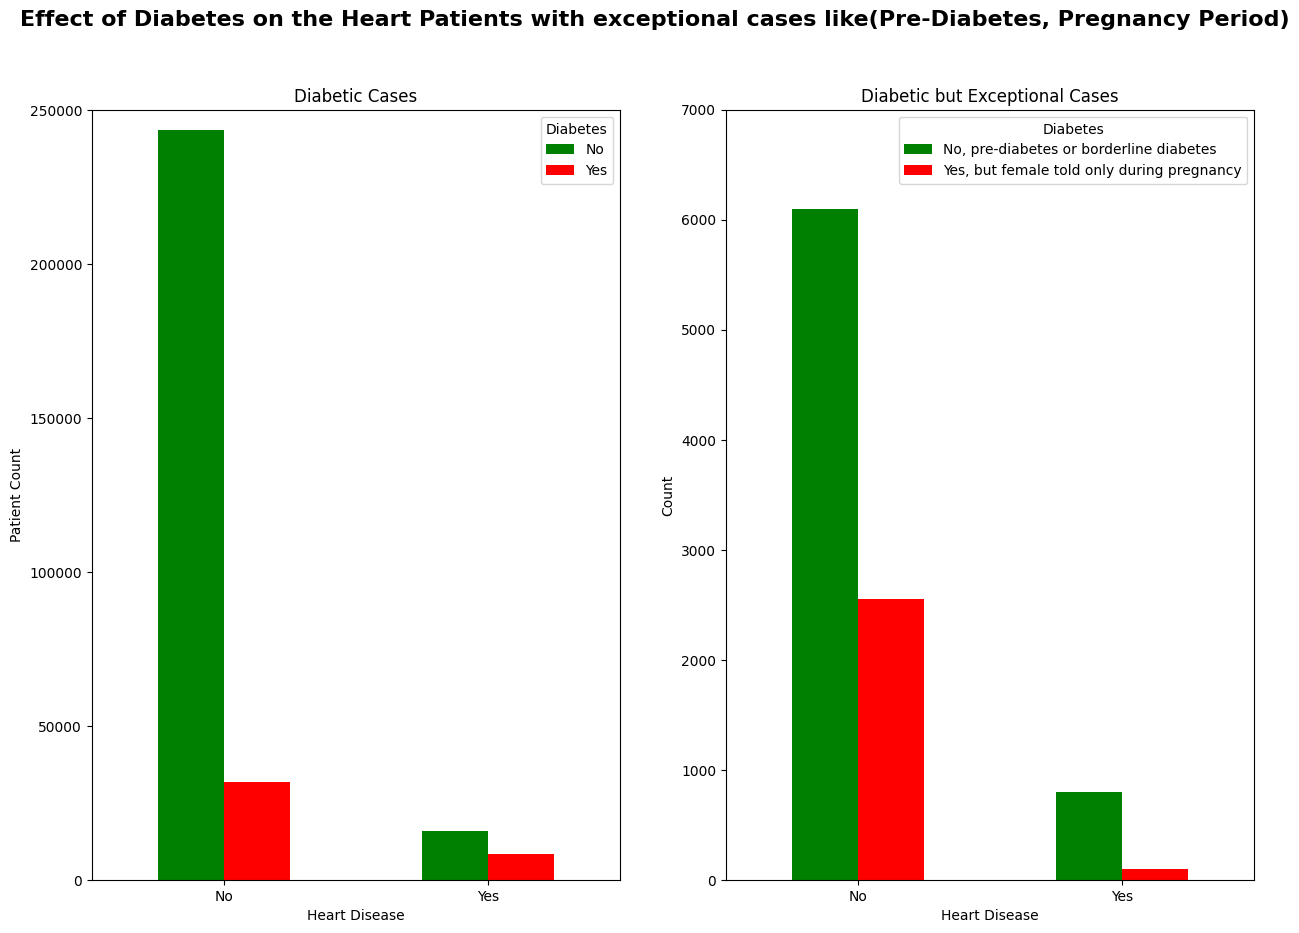

In [ ]:
### Relation between diabaetes and heart disease
diabeticHeart = data[['Diabetes', 'Heart_Disease']]
normalCases = diabeticHeart[(diabeticHeart['Diabetes'] == 'Yes' ) | (diabeticHeart['Diabetes'] == 'No')]
grouppednormal  = normalCases.groupby('Heart_Disease')['Diabetes'].value_counts().unstack()
exceptionalCases = diabeticHeart[~diabeticHeart['Diabetes'].isin(['Yes', 'No'])]
exceptionalDiabetic  = exceptionalCases.groupby('Heart_Disease')['Diabetes'].value_counts().unstack()
fig, ax = plt.subplots(1,2,figsize = (15,10))
def normalandExceptionalDiabetic(data, title, xlabel, ylabel, axes, ylim1, ylim2):
    data.plot(kind = 'bar',stacked=False, color = ['green','red'], ax = axes)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
    axes.set_ylim(ylim1,ylim2)

normalandExceptionalDiabetic(grouppednormal, 'Diabetic Cases','Heart Disease','Patient Count', ax[0], 0,250000)
normalandExceptionalDiabetic(exceptionalDiabetic, 'Diabetic but Exceptional Cases','Heart Disease','Count', ax[1], 0,7000)
plt.suptitle("Effect of Diabetes on the Heart Patients with exceptional cases like(Pre-Diabetes, Pregnancy Period)", fontsize = 16, fontweight= 'bold')

###  While diabetes is present in some heart disease cases, a substantial majority of individuals (both with and without heart disease) either do not have diabetes or fall into pre-diabetic/gestational categories, indicating that heart disease is not solely driven by diabetes, and many with diabetes do not have heart disease.

---

### Question 8: What are the most common comorbidities among people with heart disease?


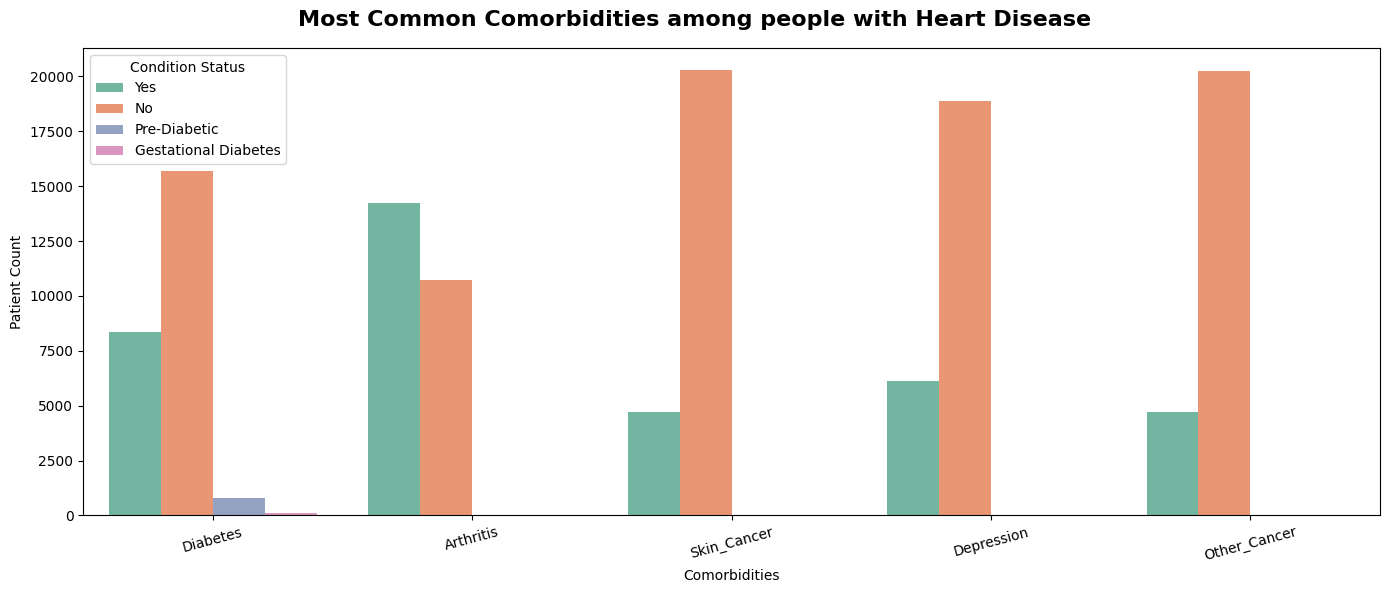

In [ ]:
comorbidities = ['Diabetes', 'Arthritis', 'Skin_Cancer', 'Depression', 'Other_Cancer']
hasHeartDisease = data[data['Heart_Disease'] == 'Yes']
hasHeartDisease.loc[:,'Diabetes'] = hasHeartDisease['Diabetes'].replace({''
    'No, pre-diabetes or borderline diabetes': 'Pre-Diabetic',
    'Yes, but female told only during pregnancy': 'Gestational Diabetes'})

meltedData = hasHeartDisease[comorbidities].melt(var_name='Comorbidities', value_name='Status')
plt.figure(figsize=(14, 6))
sns.countplot(data = meltedData, x = 'Comorbidities', hue = 'Status', palette='Set2')
plt.ylabel('Patient Count')
plt.xlabel('Comorbidities')
plt.xticks(rotation=15)
plt.suptitle("Most Common Comorbidities among people with Heart Disease", fontsize = 16, fontweight = 'bold')
plt.legend(title='Condition Status')
plt.tight_layout()
plt.show()


### Among individuals with heart disease, arthritis and diabetes were the most prevalent comorbidities, while depression and cancer were present in smaller but significant portions of the population.

---

### Question 9: What does the BMI distribution look like overall?

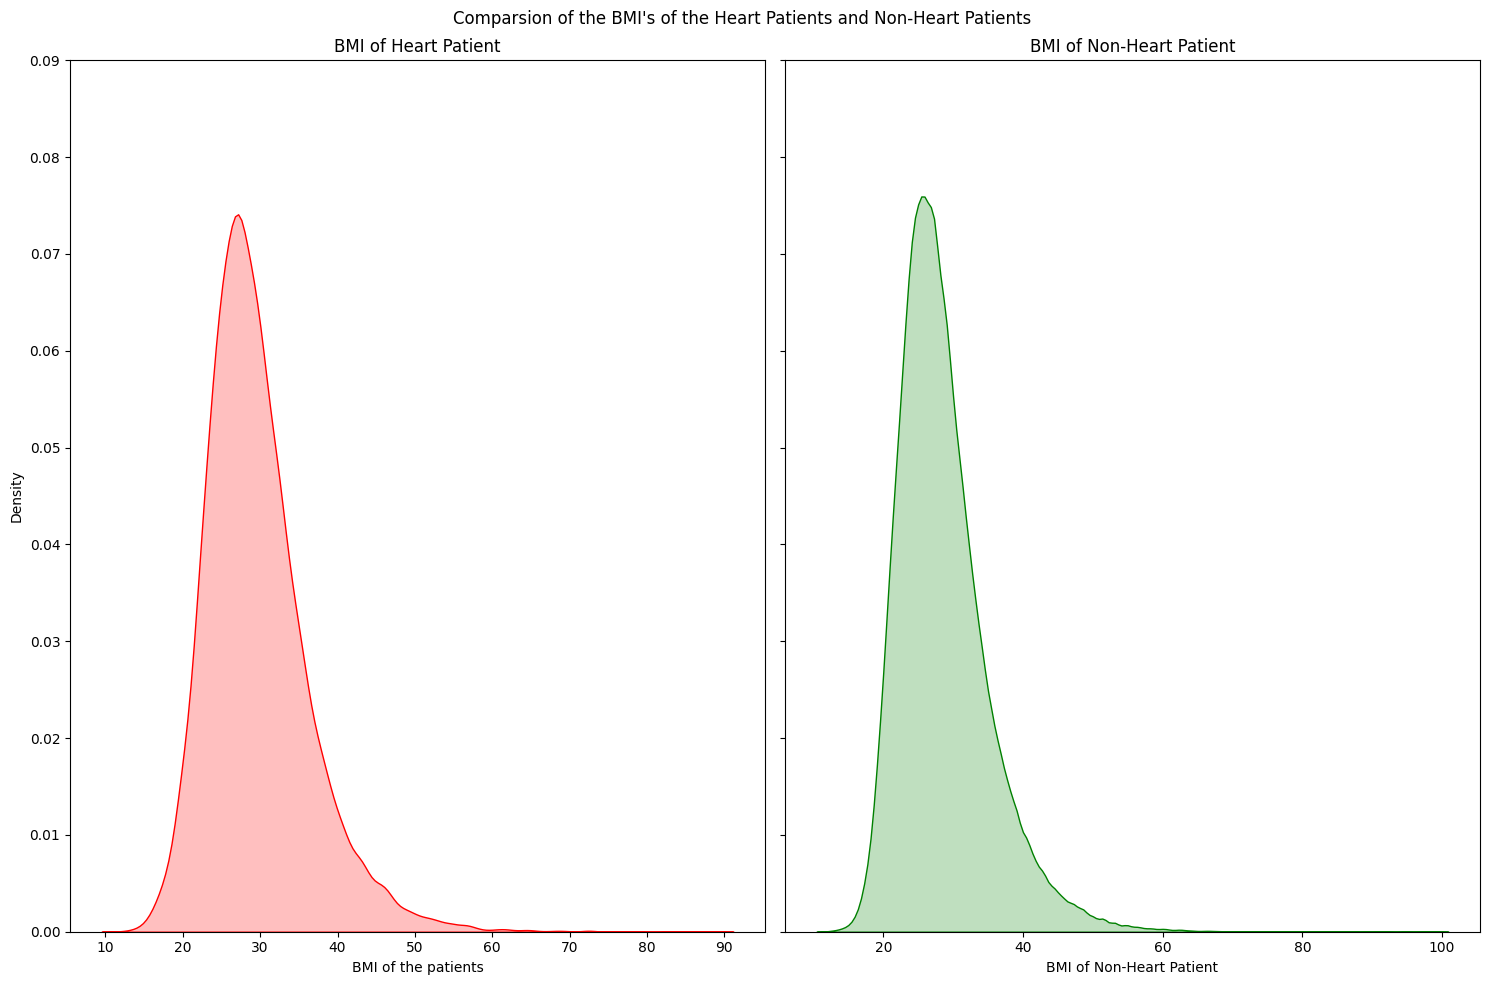

In [ ]:
bmiHeart = data.loc[:,['Heart_Disease', 'BMI']]
hasHeartProblem =  bmiHeart[bmiHeart['Heart_Disease'] == "Yes"]
noHeartProblem = bmiHeart[bmiHeart['Heart_Disease'] == "No"]
fig,ax = plt.subplots(1,2, figsize = (15,10), sharey = True)
def bmi(x,data, title, xlabel, ylabel, axes, color):
    sns.kdeplot(data, x = x, fill = True, ax = axes, color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    plt.yticks(np.arange(0,0.1,0.01))


bmi('BMI', hasHeartProblem, 'BMI of Heart Patient', 'BMI of the patients', 'Density', ax[0], 'red')
bmi('BMI', noHeartProblem, 'BMI of Non-Heart Patient', 'BMI of Non-Heart Patient', '', ax[1], 'green')
plt.suptitle("Comparsion of the BMI's of the Heart Patients and Non-Heart Patients ")
plt.tight_layout()
plt.show()



### "Heart disease patients tend to have slightly higher BMI values on average, with a broader distribution and a longer tail toward obesity, compared to non-heart disease patients."

---

### Which features are most correlated with BMI? 

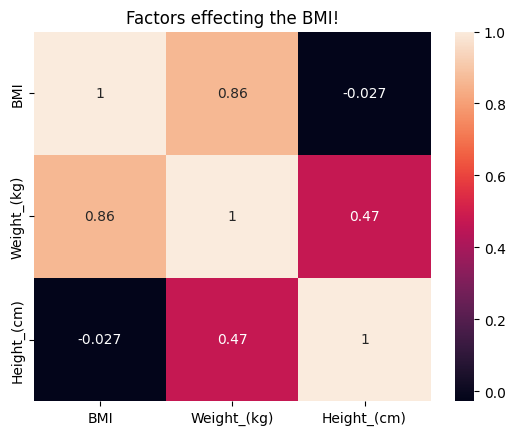

In [ ]:
bmiContributors = data[['BMI','Weight_(kg)','Height_(cm)']]
sns.heatmap(bmiContributors.corr(), annot= True)
plt.title("Factors effecting the BMI!")
plt.show()

### Indeed, the chart confirms that the widely held view, that weight is a primary determinant of BMI, is accurate, as it demonstrates a significant positive correlation between the two.

---

In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'General_Health', 'Checkup', 'Exercise', 'Heart_Disease',
       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis',
       'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'SexBinary'],
      dtype='object')


### Hypothesis Questions

---

### Question 1. "Do patients who report poor general health have a significantly higher risk of heart disease?"

In [ ]:
generalHealthAndHeart = data.loc[:, ['Heart_Disease', 'General_Health']]
generalHealthAndHeart['General_Health'] = generalHealthAndHeart['General_Health'].apply(lambda x:'Poor' if x == 'Poor' else 'Good')
contigencyTable = pd.crosstab(generalHealthAndHeart['Heart_Disease'], generalHealthAndHeart['General_Health'])
chi2matrix = [[7729,276154], # 7729 of them had Poor General Health with No Heart Disease
              [3602,21369]] # 3602 of them had Poor General Health with Heart Disease

stats,pValue,dof,expected = chi2_contingency(chi2matrix) # pValue <= 0.05 which means we reject the null Hypothesis 

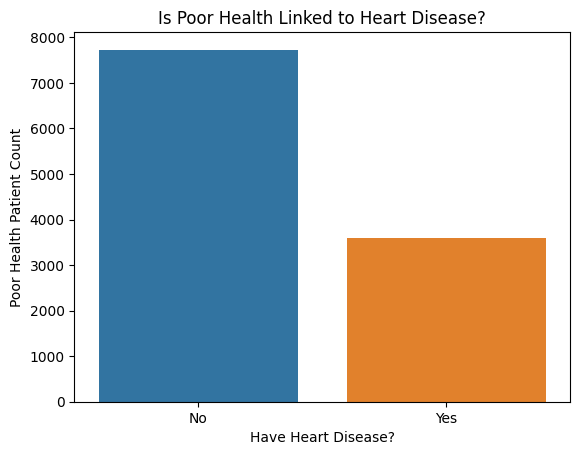

In [ ]:
##Visual Proof 
contigencyTable = contigencyTable.reset_index()
poorHealth = contigencyTable.loc[:, ['Heart_Disease','Poor']]
sns.barplot(x = 'Heart_Disease', y = 'Poor', data = poorHealth, hue = 'Heart_Disease')
plt.title("Is Poor Health Linked to Heart Disease?")
plt.xlabel("Have Heart Disease?")
plt.ylabel("Poor Health Patient Count")
plt.show()

### Even though more people without heart disease report poor health in absolute numbers, the rate of poor health among those with heart disease is much higher.

### As per the statistical testing the chance of having Heart Attack with Poor Health is 5 times more compared to that of Good Health

---



### Question 2 : Does lack of exercise correlate with a significantly higher heart disease rate?

In [ ]:
exerciseHeart = data.loc[:, ['Heart_Disease', 'Exercise']]
contigencyTable = pd.crosstab(exerciseHeart['Heart_Disease'], exerciseHeart['Exercise'])
chi2matrix = [[60469,223414], # 60469 of them did no Exercies and had no Heart Disease
              [9004,15967]] # 9004 of them did no Exercises and had Heart Disease
stats,pValue,dof,expected = chi2_contingency(chi2matrix) # pValue <= 0.05 which means we reject the null Hypothesis 

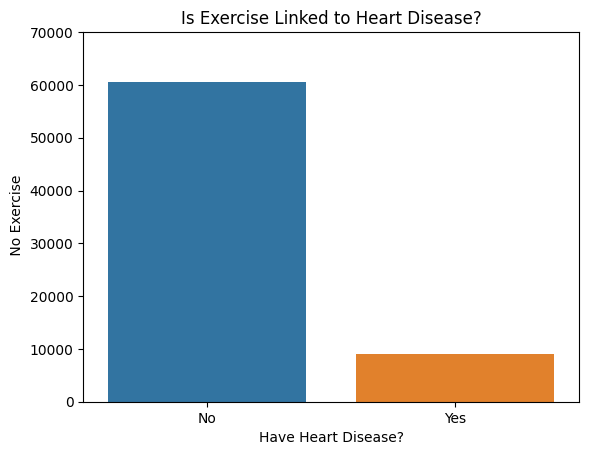

In [ ]:
contigencyTable = contigencyTable.reset_index()
noExerciese = contigencyTable[['Heart_Disease','No']]
sns.barplot(x = 'Heart_Disease', y = 'No', data = noExerciese, hue = 'Heart_Disease')
plt.title("Is Exercise Linked to Heart Disease?")
plt.xlabel("Have Heart Disease?")
plt.ylabel(" No Exercise")
plt.ylim(0,70000)
plt.show()

### People who do not exercise have a higher proportion of heart disease (9004 out of 69473, ≈13%) compared to those who do exercise (15967 out of 239381, ≈6.7%), indicating that lack of exercise is associated with a greater risk of heart disease.

---

### Question 3: Is BMI a significant predictor of Heart Disease?!


In [ ]:
bmiHeart ## Data we will be using!
## Lets do the shapiro test to check for the normality 
stats,pValues = shapiro(bmiHeart['BMI']) ## pValue <=0.05 so it is not normal
## So we use the non parametric testing also known as mannwhitney test 
hasHeartProblem = bmiHeart[bmiHeart['Heart_Disease'] == 'Yes']['BMI']
noHeartProblem = bmiHeart[bmiHeart['Heart_Disease'] == 'No']['BMI']
stats,pValue = mannwhitneyu(hasHeartProblem,noHeartProblem) ## pValue <= 0.05 which means we reject the null hypothesis

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 308854.
  res = hypotest_fun_out(*samples, **kwds)


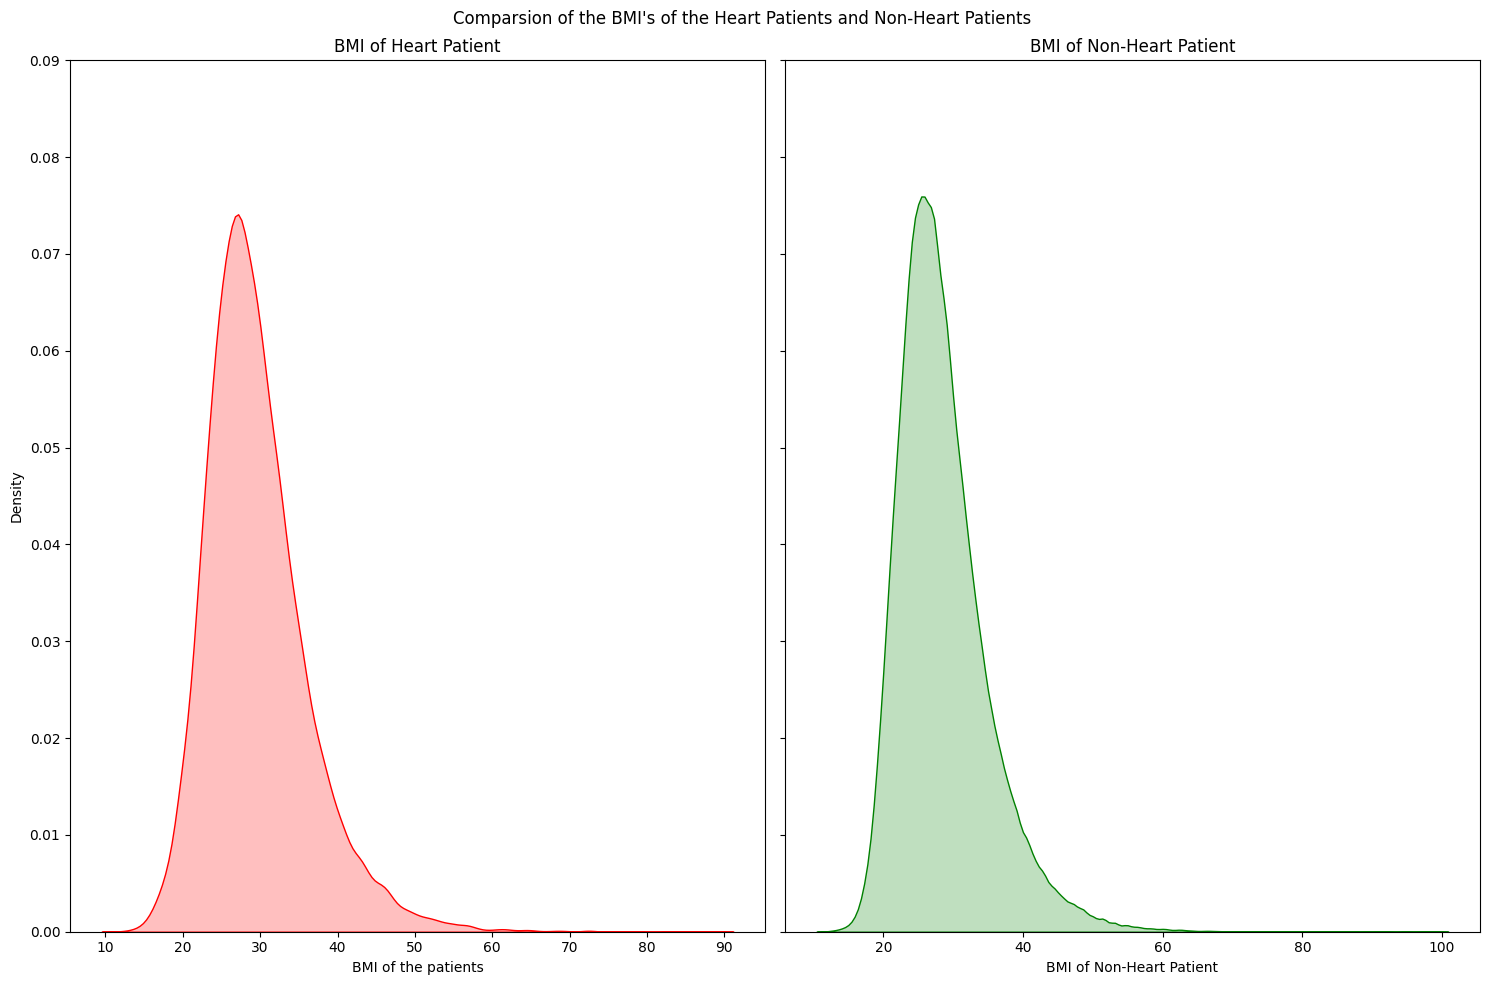

In [ ]:
## Visual Representation
bmiHeart = data.loc[:,['Heart_Disease', 'BMI']]
hasHeartProblem =  bmiHeart[bmiHeart['Heart_Disease'] == "Yes"]
noHeartProblem = bmiHeart[bmiHeart['Heart_Disease'] == "No"]
fig,ax = plt.subplots(1,2, figsize = (15,10), sharey = True)
def bmi(x,data, title, xlabel, ylabel, axes, color):
    sns.kdeplot(data, x = x, fill = True, ax = axes, color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    plt.yticks(np.arange(0,0.1,0.01))


bmi('BMI', hasHeartProblem, 'BMI of Heart Patient', 'BMI of the patients', 'Density', ax[0], 'red')
bmi('BMI', noHeartProblem, 'BMI of Non-Heart Patient', 'BMI of Non-Heart Patient', '', ax[1], 'green')
plt.suptitle("Comparsion of the BMI's of the Heart Patients and Non-Heart Patients ")
plt.tight_layout()
plt.show()

### "Heart disease patients tend to have slightly higher BMI values on average, with a broader distribution and a longer tail toward obesity, compared to non-heart disease patients."
### And since BMI is more related to weight of a person, it is better to balance the weight in order to be safe from CVD

---

### Question 4: The combined effect of high BMI and lack of exercise significantly increases the likelihood of heart disease.

In [ ]:
combinedData = data.loc[:,['Heart_Disease', 'Exercise','BMI']] ## This is the data we will be using
combinedData['Heart_DiseaseB'] = combinedData['Heart_Disease'].map({'Yes':0,'No':1})
combinedData['ExerciseB'] = combinedData['Exercise'].map({'Yes':0,'No':1})
model = logit('Heart_DiseaseB~BMI*ExerciseB', data = combinedData).fit() ## Each pValue and combined pValue are less than 0.005
combinedData['Prediction'] = model.predict(combinedData)


Optimization terminated successfully.
         Current function value: 0.276122
         Iterations 7


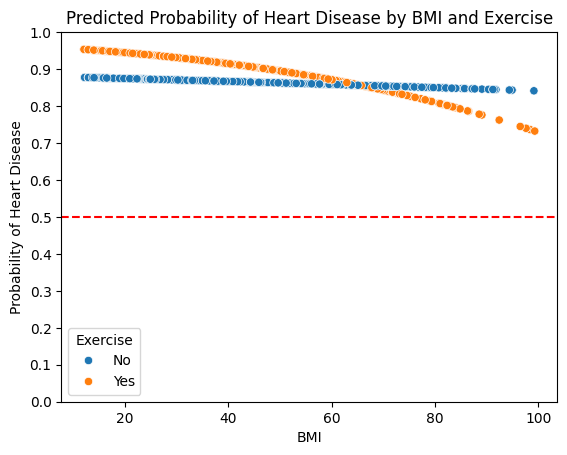

In [ ]:
## Visual Proof 
sns.scatterplot(data = combinedData, x = 'BMI', y = 'Prediction', hue = 'Exercise')
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,0.1))
plt.title("Predicted Probability of Heart Disease by BMI and Exercise")
plt.ylabel("Probability of Heart Disease")
plt.xlabel("BMI")
plt.axhline(y = 0.5, color = 'red', linestyle = '--', label = ('Borderline'))
plt.show()

### The analysis showed that among individuals with higher BMI, those who do not engage in regular physical activity have a substantially greater risk of developing heart disease compared to those who exercise.

### This finding suggests that physical activity plays a moderating role, helping to offset the negative cardiovascular effects of high body mass. These insights support the importance of targeted health interventions focused not just on weight, but also on promoting regular exercise, especially among high-BMI populations.

---

